##**Connect Colab with Google Drive**

In [7]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


##**Imported required libraries**

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

##Reading consumer complaints dataset

In [9]:
df= pd.read_csv("/content/consumer_complaints.csv")
df.head()

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074.0
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080.0
2,08/30/2013,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473.0
3,08/30/2013,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,NaN,NaN,"Navient Solutions, Inc.",MD,21402,NaN,NaN,Email,08/30/2013,Closed with explanation,Yes,Yes,510326.0
4,08/30/2013,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,NaN,Resurgent Capital Services L.P.,GA,30106,NaN,NaN,Web,08/30/2013,Closed with explanation,Yes,Yes,511067.0


In [10]:
cp= df["product"].value_counts()
cp

,count
product,
Mortgage,35535
Debt collection,31156
Credit reporting,21901
Bank account or service,12157
Credit card,11595
Consumer Loan,3733
Student loan,3466
Payday loan,1162
Money transfers,959


In [11]:
cr= df['company_response_to_consumer'].value_counts()
cr

,count
company_response_to_consumer,
Closed with explanation,93014
Closed with non-monetary relief,17800
Closed with monetary relief,7926
Closed,2774
Untimely response,274


In [12]:
disputed = df['consumer_disputed?'].value_counts()
tdispute = df['company'].loc[df['consumer_disputed?'] == 'Yes'].value_counts()[:10]
tnodispute = df['company'].loc[df['consumer_disputed?'] == 'No'].value_counts()[:10]

In [13]:
disputed

,count
consumer_disputed?,
No,98515
Yes,23273


In [14]:
tdispute

,count
company,
Bank of America,1908
Wells Fargo & Company,1762
JPMorgan Chase & Co.,1461
Equifax,1399
Ocwen,1279
Experian,951
Citibank,950
Nationstar Mortgage,800
"TransUnion Intermediate Holdings, Inc.",737


In [15]:
tnodispute

,count
company,
Experian,6883
Bank of America,6824
Wells Fargo & Company,6142
Equifax,6067
"TransUnion Intermediate Holdings, Inc.",5066
JPMorgan Chase & Co.,4974
Citibank,3898
Ocwen,3878
Nationstar Mortgage,2537


#**Creating Word Cloud**

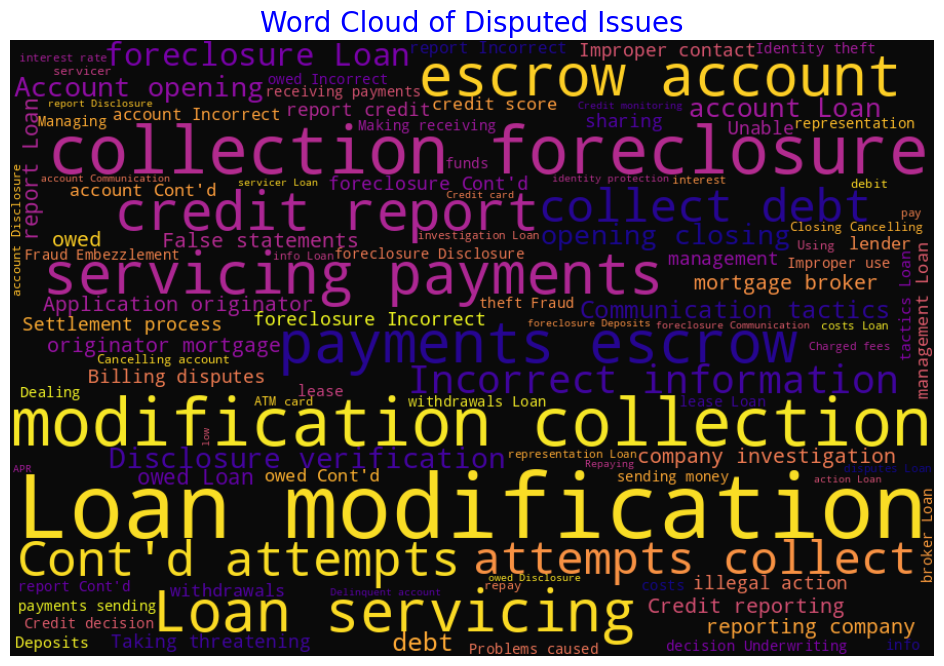

In [16]:
import numpy as np
from PIL import Image

disputes_issue = df['issue'][df['consumer_disputed?'] == 'Yes']

color_theme = "plasma"
background = "#0A0A0A"
mask_image = None



word_cloud = WordCloud(
    width=900,
    height=600,
    background_color=background,
    colormap=color_theme,
    stopwords=STOPWORDS,
    max_words=2000,
    max_font_size=120,
    min_font_size=10,
    mask=mask_image,
    contour_width=2,
    contour_color="red",

    mode = "RGBA"

).generate(" ".join(disputes_issue.astype(str)))

plt.figure(figsize=(14, 8))
plt.imshow(word_cloud, interpolation="bilinear")
plt.title("Word Cloud of Disputed Issues", fontsize=20, color="grey" if background=="red" else "blue")
plt.axis("off")
plt.show()


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
df['issue'] = df['issue'].str.strip().str.lower()

## Encode labels

In [42]:
from sklearn import preprocessing

# 1️⃣ Keep only rows where consumer_disputed? is Yes / No
df_clean = df[df['consumer_disputed?'].isin(['Yes', 'No'])].copy()

# 2️⃣ Encode Yes = 1, No = 0 (no LabelEncoder needed)
df_clean['consumer_disputed'] = df_clean['consumer_disputed?'].map({'Yes': 1, 'No': 0})

# 3️⃣ Check the values
print(df_clean['consumer_disputed'].unique())






[1 0]


In [37]:
df

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id,consumer_disputed
0,08/30/2013,Mortgage,Other mortgage,"loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074.0,1
1,08/30/2013,Mortgage,Other mortgage,"loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080.0,1
2,08/30/2013,Credit reporting,NaN,incorrect information on credit report,Account status,NaN,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473.0,0
3,08/30/2013,Student loan,Non-federal student loan,repaying your loan,Repaying your loan,NaN,NaN,"Navient Solutions, Inc.",MD,21402,NaN,NaN,Email,08/30/2013,Closed with explanation,Yes,Yes,510326.0,1
4,08/30/2013,Debt collection,Credit card,false statements or representation,Attempted to collect wrong amount,NaN,NaN,Resurgent Capital Services L.P.,GA,30106,NaN,NaN,Web,08/30/2013,Closed with explanation,Yes,Yes,511067.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121784,09/23/2014,Credit reporting,NaN,incorrect information on credit report,Account status,NaN,NaN,Experian,IL,60637,NaN,NaN,Postal mail,10/07/2014,Closed with explanation,Yes,No,1041604.0,0
121785,08/13/2014,Credit reporting,NaN,incorrect information on credit report,Account status,NaN,NaN,Navy FCU,FL,33412,Servicemember,NaN,Web,08/15/2014,Closed with explanation,Yes,No,982290.0,0
121786,09/17/2014,Debt collection,I do not know,communication tactics,Frequent or repeated calls,NaN,NaN,"Capital Management Services, LP",MD,21206,NaN,NaN,Web,09/17/2014,Closed with explanation,Yes,Yes,1032374.0,1
121787,09/17/2014,Mortgage,Conventional fixed mortgage,"loan modification,collection,foreclosure",NaN,NaN,NaN,M&T Bank Corporation,NY,14138,NaN,NaN,Phone,09/17/2014,Closed with explanation,Yes,No,1032041.0,0


## Dividing dataset into test and train set

In [48]:
x = df_clean['issue']
y = df_clean['consumer_disputed']

# Check value counts before splitting
print(y.value_counts())

# Train-test split with stratification (safe now)
from sklearn.model_selection import train_test_split
x, x_test, y, y_test = train_test_split(
    x, y, test_size=0.25, random_state=42, stratify=y
)


consumer_disputed
0    98515
1    23273
Name: count, dtype: int64


## Vectorize text reviews to numbers

In [49]:
vec = CountVectorizer(stop_words='english')
x = vec.fit_transform(x).toarray()
x_test = vec.transform(x_test).toarray()

##**Navie Bayes**

In [50]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x, y)

MultinomialNB()

In [51]:
model.score(x_test, y_test)

0.8087167865471147

In [52]:
model.predict(vec.transform(['Communication tactics']))

array([0])

# **Decision Tree**


In [53]:
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier(criterion='entropy', random_state=1)

In [54]:
dct.fit(x,y)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [55]:
dct.score(x_test,y_test)

0.8089138502972378

In [56]:
dct.predict(vec.transform(['Managing the loan or lease']))

array([0])

# **KNN**

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [58]:
model1 = KNeighborsClassifier(n_neighbors=2)
model1.fit(x,y)

y_pred = model1.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy',accuracy)

Accuracy 0.7913751765362762


## Accuracy of ML Algorithms


In [59]:
a = model.score(x_test, y_test)
b = dct.score(x_test,y_test)
c = accuracy
print("Navie Bayes Accuracy = ",a)
print("Decision Tree Accuracy = ",b)
print("KNN Accuracy = ",c)


Navie Bayes Accuracy =  0.8087167865471147
Decision Tree Accuracy =  0.8089138502972378
KNN Accuracy =  0.7913751765362762


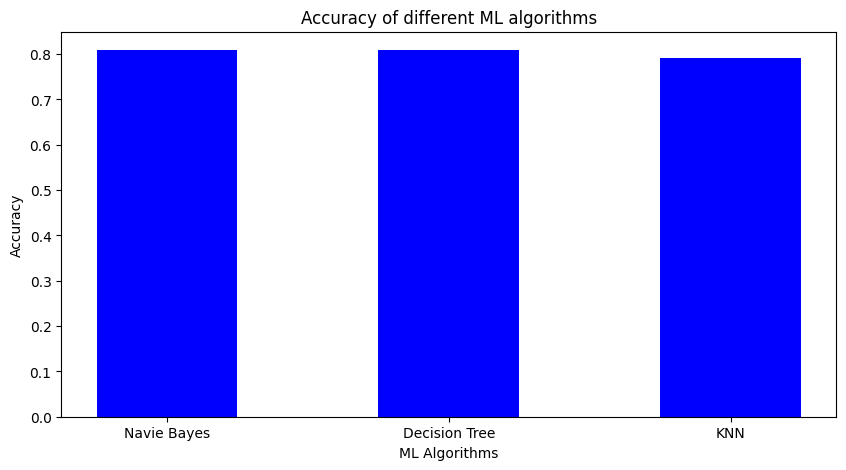

In [60]:
data = {"Navie Bayes":a, "Decision Tree":b,"KNN":c}
ML = list(data.keys())
Accuracy = list(data.values())

fig = plt.figure(figsize = (10,5))

plt.bar(ML, Accuracy, color = "blue", width = 0.5)

plt.xlabel("ML Algorithms")
plt.ylabel("Accuracy")
plt.title("Accuracy of different ML algorithms")
plt.show()